### Unzip dataset

In [37]:
import zipfile

zip_file = "ibrs_dataset.zip"

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall()

print("Unzipped files")

Unzipped files


### Read one image and visualize

In [38]:
import numpy as np

dataset_path = "ibsr_3d/"
train_path = "train/"
valid_path = "valid/"
imgs_path = "images/"
mask_path = "mask/"

test_img_path = "image_0.npy"
test_mask_path = "mask_0.npy"

test_img = np.load(dataset_path + train_path + imgs_path + test_img_path)
print("Shape of the test MRI volume: ", test_img.shape)

Shape of the test MRI volume:  (48, 192, 192, 1)


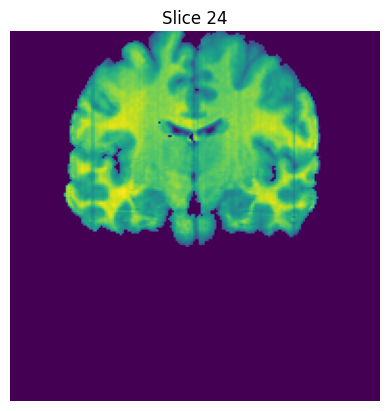

In [39]:
import matplotlib.pyplot as plt

slice_idx = test_img.shape[0] // 2

plt.imshow(test_img[slice_idx, :, :])
plt.title(f"Slice {slice_idx}")
plt.axis("off")
plt.show()

### Transform the images to .nii.gz for visualization in itk-snap easily

In [40]:
nii_path = "nii_imgs/"

voxel_size = (1.0, 3.0, 1.0) 
affine = np.diag([voxel_size[0], voxel_size[1], voxel_size[2], 1])

In [41]:
import nibabel as nib

def img_load_transform_export(img_path):
    my_img = np.load(dataset_path + img_path)

    if imgs_path in img_path:
        my_img = np.squeeze(my_img)
    else:
        my_img = np.argmax(my_img, axis=-1).astype(np.uint8)

    my_img = np.transpose(my_img, (2, 0, 1))
    my_img = np.flip(my_img, axis=1)
    my_img = np.flip(my_img, axis=2)

    nii_img = nib.Nifti1Image(my_img, affine)
    nib.save(nii_img, nii_path + img_path[:-3] + "nii.gz")

In [42]:
import glob
import os

paths_1 = [train_path, valid_path]
paths_2 = [imgs_path, mask_path]

for path1 in  paths_1:
    for path2 in paths_2:
        if not os.path.exists(nii_path + path1 + path2):
            os.makedirs(nii_path + path1 + path2)

        for path in glob.glob(dataset_path + path1 + path2 + "*.npy"):
            path = path.replace("\\", "/")
            img_load_transform_export(path[len(dataset_path):])
